<a href="https://colab.research.google.com/github/LOGITHNATHAN/AI-Echo-Your-Smartest-Conversational-Partner-project/blob/main/chatgpt_reviews_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:

import pandas as pd
import numpy as np
import re                                 # Regular expressions for pattern matching and text cleaning.
import spacy                              # Another NLP library, known for speed and performance.
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException        # To detect the language of a text (like English, French, etc.)
!pip install langdetect
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

In [5]:
# Load the dataset
df = pd.read_csv(r'/content/chatgpt_style_reviews_dataset.xlsx - Sheet1.csv')

# Show basic info
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-12-24,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No
1,2024-07-26,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No
2,2024-08-22,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No
3,2025-04-24,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No
4,2024-08-15,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes


In [6]:
df.shape

(50, 12)

In [7]:
def remove_whitespace(text):
    return " ".join(text.split())

df['review']=df['review'].apply(remove_whitespace)

In [8]:
# Language Detection
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

df['detect_language'] = df['review'].apply(detect_language)

# Filter only English reviews
df = df[df['detect_language'] == 'en']
print(df['detect_language'].value_counts())

detect_language
en    50
Name: count, dtype: int64


In [9]:
# Basic Text Cleaning
def clean_text(text):
    # Remove non-alphabetic characters (keep spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

df['review'] = df['review'].apply(clean_text)

In [10]:
# Tokenization is the process of splitting text into individual units
# Lemmatization reduces words to their base or dictionary form (lemma) by considering the context and part of speech.

In [11]:
# Tokenization + Lemmatization + Stopword Removal with spaCy
def spacy_preprocess(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

df['review'] = df['review'].apply(spacy_preprocess)
df['review']

,review
0,impressive natural language understanding good...
1,give wrong answer outdated info student moveme...
2,great tool generate content quickly interestin...
3,great tool generate content quickly start meth...
4,excellent language translation grammar fix pri...
5,explain complex topic clearly simply detail vi...
6,excellent language translation grammar fixes f...
7,give wrong answer outdated info catch easy inc...
8,give wrong answer outdated info trial suffer p...
9,helpful code debug task tax hard thousand envi...


In [12]:
df['review'] = df['review'].str.replace(r'\s*\n\s*', ' ', regex=True)

In [13]:
pd.set_option('display.max_colwidth', None)
print(df[['review']].head(10))  # Show full text of first 10 reviews

                                                                            review
0                         impressive natural language understanding good newspaper
1  give wrong answer outdated info student movement power condition camera contain
2         great tool generate content quickly interesting evening population claim
3                        great tool generate content quickly start method pressure
4          excellent language translation grammar fix price structure rate quality
5   explain complex topic clearly simply detail visit current pretty suddenly find
6                 excellent language translation grammar fixes fund country expert
7                 give wrong answer outdated info catch easy include sister speech
8                           give wrong answer outdated info trial suffer pull dark
9             helpful code debug task tax hard thousand environment sell operation


In [14]:
df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase', 'detect_language'],
      dtype='object')

In [15]:
# EXPLORATORY DATA ANALYSIS (EDA)

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

/tmp/ipython-input-969533564.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='coolwarm')


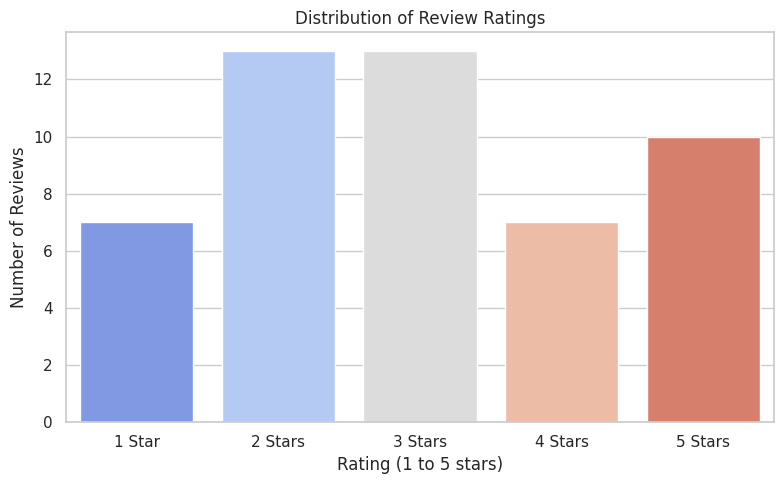

In [16]:
# 1. What is the distribution of review ratings?
# Set Seaborn style
sns.set(style="whitegrid")

# Plot the distribution of review ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='rating', palette='coolwarm')
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating (1 to 5 stars)')
plt.ylabel('Number of Reviews')
plt.xticks([0, 1, 2, 3, 4], ['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars'])
plt.tight_layout()
plt.show()

In [17]:
# 3-star and 2-star reviews are the most common — each has the highest number of reviews (13).
# 5-star reviews are moderate (10 reviews), indicating a fair number of highly satisfied users.
# 1-star and 4-star reviews are the least frequent (7 reviews each).

# Interpretation:
# The concentration around 2 and 3 stars suggests that users are neutral to slightly dissatisfied overall.
# A relatively low number of 1-star reviews implies few extremely negative experiences.
# 5-star reviews indicate some strong positive sentiment, but they don’t dominate.

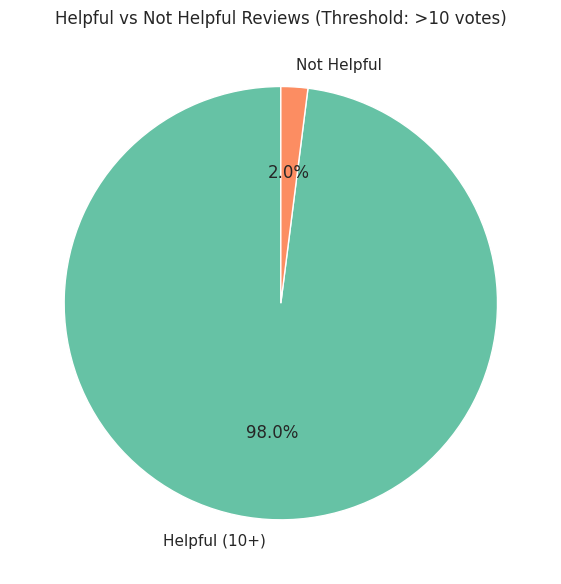

In [18]:
# 2. How many reviews were marked as helpful (above a certain threshold)?

# Define threshold
threshold = 10

# Count helpful vs not helpful
helpful_counts = pd.Series([
    'Helpful (10+)' if x > threshold else 'Not Helpful'
    for x in df['helpful_votes']
]).value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
colors = ['#66c2a5', '#fc8d62']
helpful_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Helpful vs Not Helpful Reviews (Threshold: >10 votes)')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [19]:
# 98% of reviews are considered Helpful (received more than 10 helpful votes). Only 2% are Not Helpful (≤10 helpful votes).

# Interpretation:
# This extremely high percentage of helpful reviews suggests that users find significant value in the content of the reviews.
# It indicates that most reviews are well-written, relevant, or informative, leading others to upvote them.

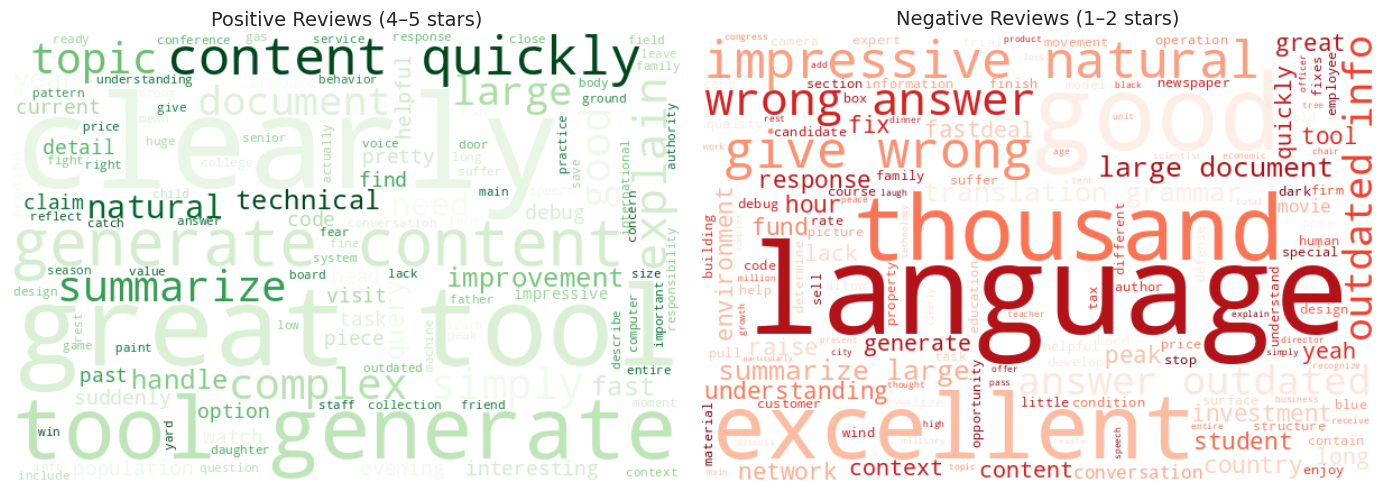

In [20]:
# 3. Most Common Keywords in Positive vs. Negative Reviews

# Filter based on ratings
positive_reviews = df[df['rating'] >= 4]['review']
negative_reviews = df[df['rating'] <= 2]['review']

# Join all text
positive_text = ' '.join(positive_reviews.dropna().astype(str))
negative_text = ' '.join(negative_reviews.dropna().astype(str))

# Create word clouds
plt.figure(figsize=(14, 6))

# Positive word cloud
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=600, height=400, background_color='white', colormap='Greens').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews (4–5 stars)", fontsize=14)

# Negative word cloud
plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=600, height=400, background_color='white', colormap='Reds').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews (1–2 stars)", fontsize=14)

plt.tight_layout()
plt.show()

In [21]:
# Positive Reviews (4–5 Stars)
# Top keywords:
# clearly, great, tool, generating, content, natural, topics, explains, complex, improvement

# Interpretation:
# Users praise the tool's clarity, quality, and content generation capabilities.
# Words like "natural", "explains", and "complex topics" suggest that users find it intelligent,
# helpful for learning, and effective at communicating complex ideas.
# The term "great tool" reflects strong overall satisfaction.

# Negative Reviews (1–2 Stars)
# Top keywords:
# understanding, good, excellent, translation, wrong answers, outdated info, sometimes, lacks, thousand, language

# Interpretation:
# Even in negative reviews, words like "good" or "excellent" may indicate mixed Sentiment may still be labeled negative if the overall tone is dissatisfied.
# Complaints center around incorrect responses, translation issues, and outdated information.
# Frequent mention of "sometimes", "lacks", and "wrong" implies inconsistency and accuracy issues.
# Keywords like "thousand" or "language" may reflect issues with bulk data or multilingual support.

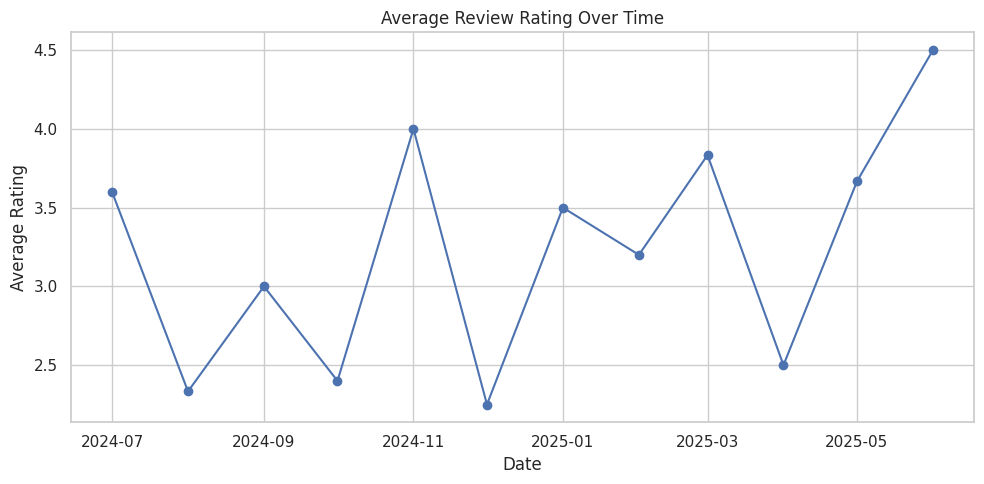

In [23]:
# 4. How has the average rating changed over time?

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Group by time — weekly or monthly
avg_rating_over_time = df.groupby(df['date'].dt.to_period('M'))['rating'].mean().reset_index()
avg_rating_over_time['date'] = avg_rating_over_time['date'].dt.to_timestamp()

# Plot the line chart
plt.figure(figsize=(10, 5))
plt.plot(avg_rating_over_time['date'], avg_rating_over_time['rating'], marker='o', linestyle='-')
plt.title('Average Review Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# Y-axis (Average Rating): Reflects the satisfaction level (presumably from 1 to 5).
# X-axis (Date): Monthly time stamps ranging from mid-2024 to mid-2025.

# Overall Trend:
# There is noticeable fluctuation in the ratings.
# Lowest point: Around December 2024 (~2.2 rating).
# Highest point: June 2025 (~4.5 rating).
# Recent months show an upward trend, indicating improving user satisfaction.

/tmp/ipython-input-2907904043.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_location.values, y=avg_rating_by_location.index, palette="coolwarm")


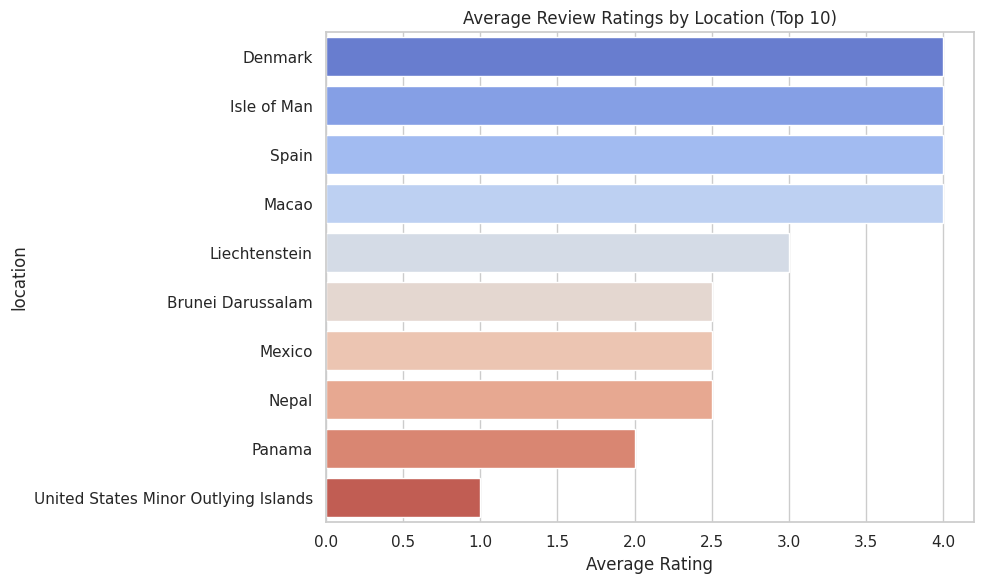

In [25]:
# 5. How Do Ratings Vary by User Location?

# Top 10 countries by review count
top_countries = df['location'].value_counts().nlargest(10).index
filtered_df = df[df['location'].isin(top_countries)]

# Average rating by location
avg_rating_by_location = filtered_df.groupby('location')['rating'].mean().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_by_location.values, y=avg_rating_by_location.index, palette="coolwarm")
plt.xlabel('Average Rating')
plt.title('Average Review Ratings by Location (Top 10)')
plt.tight_layout()
plt.show()

In [26]:
# X-axis: Shows the average review rating (presumably on a scale of 1 to 5).
# Y-axis: Lists the top 10 locations based on rating values (descending order).
# High Satisfaction Regions:
# European regions like Denmark, Isle of Man, and Spain lead in satisfaction.
# Macao and Liechtenstein also perform relatively well.
# Low Satisfaction Regions:
# Countries like Panama and U.S. Minor Outlying Islands show significantly lower average ratings, with scores closer to 1.0–2.0.

# Potential Factors:
# These differences might reflect:
# Regional customer expectations
# Localization quality
# Accessibility or feature availability
# Support responsiveness
# Cultural perceptions of satisfaction

In [27]:
# 6. Which Platform Gets Better Reviews? (Web vs. Mobile)

# Group by platform and calculate average ratings
avg_rating_by_platform = df.groupby('platform')['rating'].mean().reset_index()

# Bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x='platform', y='rating', data=avg_rating_by_platform, palette='Set2')
plt.title('Average Rating by Platform (Web vs Mobile)')
plt.ylabel('Average Rating')
plt.xlabel('Platform')
plt.ylim(0, 5)
plt.tight_layout()
plt.show(

SyntaxError: incomplete input (ipython-input-2602430634.py, line 14)

In [28]:
# High-Performing Platforms
# Amazon & App Store show relatively higher satisfaction.
# Indicates strong UX, good performance, or effective customer support.
# Could be used as benchmarks for what’s working well.

# Low-Performing Platforms
# Flipkart & Google Play receive lower average ratings.
# UI/UX issues specific to these apps
# Feature inconsistency or bugs
# Poorer update cycles or customer support
# Actionable Insight: These platforms deserve focused product improvement efforts.

# Helps Product Teams Focus Improvements:
# Identify what's different in high-rated apps (App Store vs Google Play) and adapt.
# UX/UI Optimization
# Prioritize Bug Fixes and Feature Enhancements

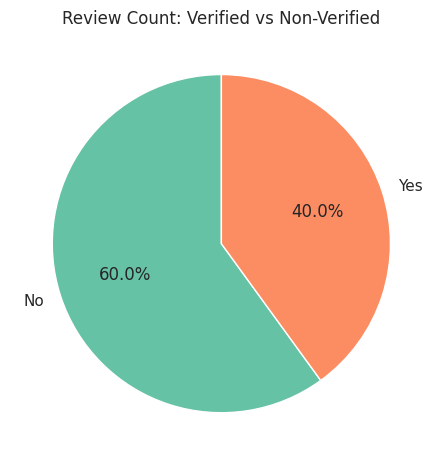

In [29]:
# 7. Are Verified Users More Satisfied Than Non-Verified Ones?

# Distribution of Verified vs Non-Verified Reviews
verified_counts = df['verified_purchase'].value_counts()

# Plotting side-by-side pie charts
plt.figure(figsize=(12, 6))
colors = ['#66c2a5', '#fc8d62']

# Subplot 1: Review count
plt.subplot(1, 2, 1)
verified_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    labels=verified_counts.index,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Review Count: Verified vs Non-Verified')
plt.ylabel('');

In [30]:
# 1. Verified Users Are More Honest / Critical
# Verified users might give more honest and critical feedback.
# They’ve paid or used the product seriously, so they hold it to a higher standard.

# 2. Fake Positive Reviews from Non-Verified Users
# Non-verified reviews might be less authentic or even promotional.
# It's not uncommon to see higher ratings from non-verified users in such cases.

# 3. Expectation Gap
# Verified users might have higher expectations and are disappointed if the product underdelivers.
# Non-verified users may have just tried the product briefly or judged it lightly.

/tmp/ipython-input-3748945557.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='review_length', data=df, palette='Blues')


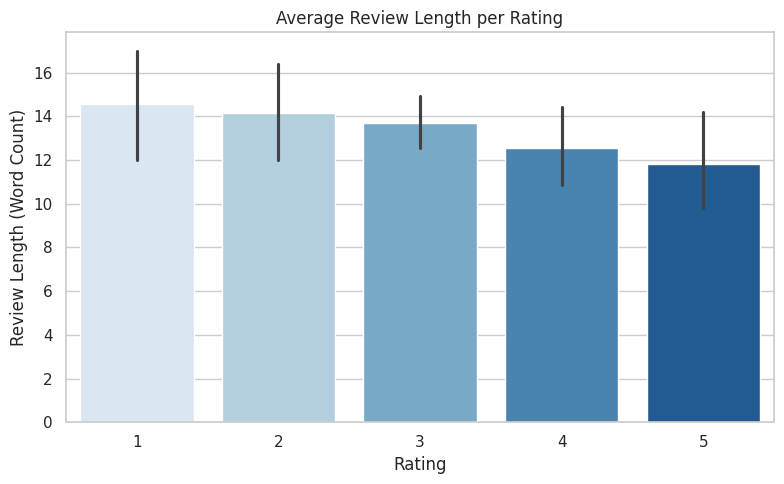

In [31]:
# 8. Average Length of Reviews per Rating Category

# Bar Chart: Average Review Length by Rating
plt.figure(figsize=(8, 5))
sns.barplot(x='rating', y='review_length', data=df, palette='Blues')
plt.title('Average Review Length per Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length (Word Count)')
plt.tight_layout()
plt.show()

In [32]:
# people write longer reviews when they're unhappy and shorter reviews when they are very happy.

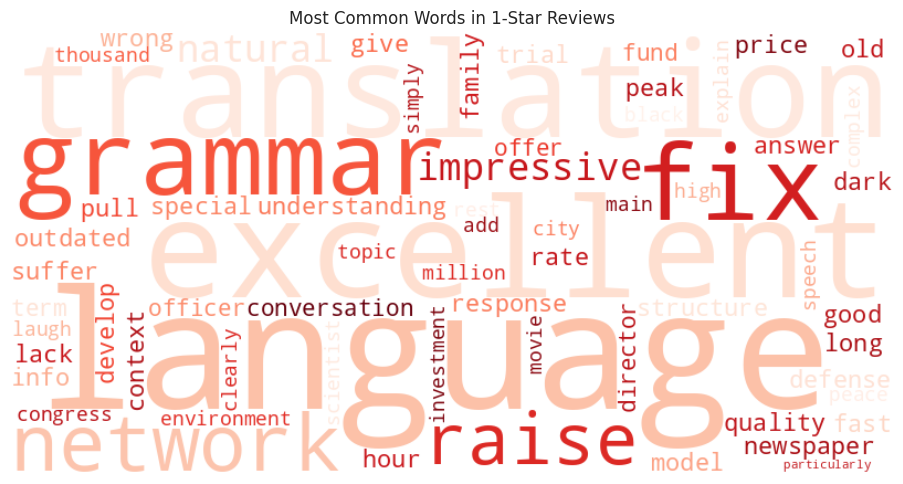

In [33]:
# 9. Most Mentioned Words in 1-Star Reviews

# Filter 1-star reviews
one_star_text = ' '.join(df[df['rating'] == 1]['review'].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(one_star_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in 1-Star Reviews')
plt.tight_layout()
plt.show()

In [34]:
#  Spot recurring issues or complaints.

/tmp/ipython-input-598308749.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='version', y='rating', data=version_avg, palette='viridis')


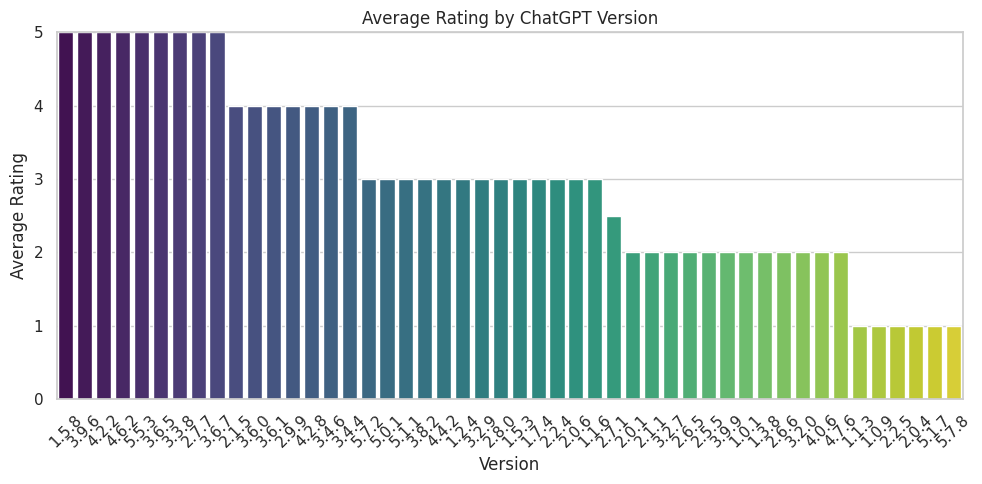

In [36]:
# 10. Which ChatGPT Version Received the Highest Average Rating?

# Group by version and calculate average rating
version_avg = df.groupby('version')['rating'].mean().sort_values(ascending=False).reset_index()

# Bar plot: Versions vs average ratings
plt.figure(figsize=(10, 5))
sns.barplot(x='version', y='rating', data=version_avg, palette='viridis')
plt.title('Average Rating by ChatGPT Version')
plt.xlabel('Version')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

In [37]:
# Evaluate improvement or regression across updates.

In [38]:
# Sentiment Labeling

def label_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['rating'].apply(label_sentiment)
print(df[['rating', 'sentiment']].head(10))

# Ratings 1 or 2 → 'negative'
# Rating 3 → 'neutral'
# Ratings 4 or 5 (or anything above 3) → 'positive'

   rating sentiment
0       1  negative
1       2  negative
2       5  positive
3       3   neutral
4       1  negative
5       4  positive
6       2  negative
7       3   neutral
8       1  negative
9       2  negative


In [39]:
df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase', 'detect_language', 'sentiment'],
      dtype='object')

In [40]:
df.to_csv(r'/content/chatgpt_style_reviews_dataset.xlsx - Sheet1.csv', index=False)

/tmp/ipython-input-472746610.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


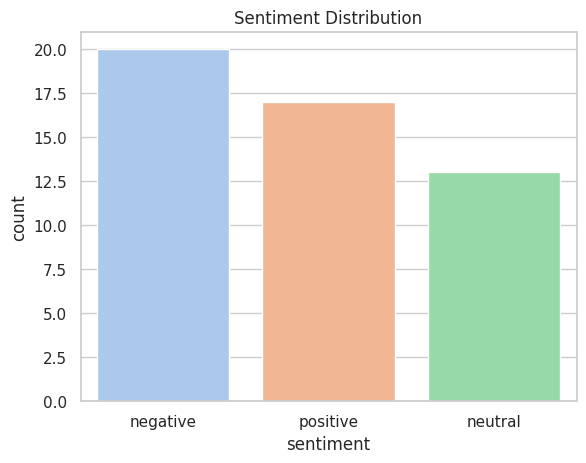

In [41]:
# Count of Each Sentiment
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title('Sentiment Distribution')
plt.show()

In [42]:
# What is a WordCloud?
# A WordCloud is a visual representation of text data where the size of each word reflects its frequency
# or importance in the text. The more often a word appears, the bigger and bolder it looks in the cloud.
# It’s a popular way to get an immediate sense of the most common words in a collection of documents.

/tmp/ipython-input-3430321464.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_freq.sort_values(by='frequency', ascending=False), x='frequency', y='word', palette='Blues_r')


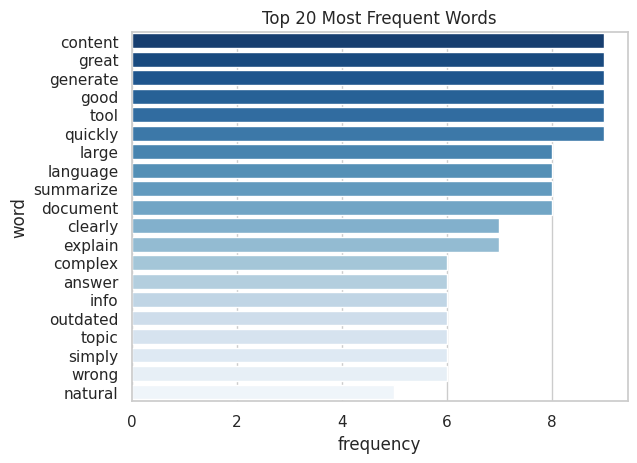

In [43]:
# Most Frequent Words (Histogram)
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['review'])

# Convert to DataFrame
word_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'frequency': X.toarray().sum(axis=0)
})

# Plot
sns.barplot(data=word_freq.sort_values(by='frequency', ascending=False), x='frequency', y='word', palette='Blues_r')
plt.title('Top 20 Most Frequent Words')
plt.show()

In [44]:
df['sentiment'] = df['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Features and target
X_text = df['review']
y = df['sentiment']

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1,2), stop_words='english')
X_tfidf = tfidf.fit_transform(X_text)

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf.toarray(), y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)


🔹 Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.50      0.67      0.57         6
           2       0.44      0.67      0.53         6

    accuracy                           0.50        18
   macro avg       0.65      0.50      0.46        18
weighted avg       0.65      0.50      0.46        18

Accuracy: 0.5
AUC-ROC Score (OvR): 0.736111111111111


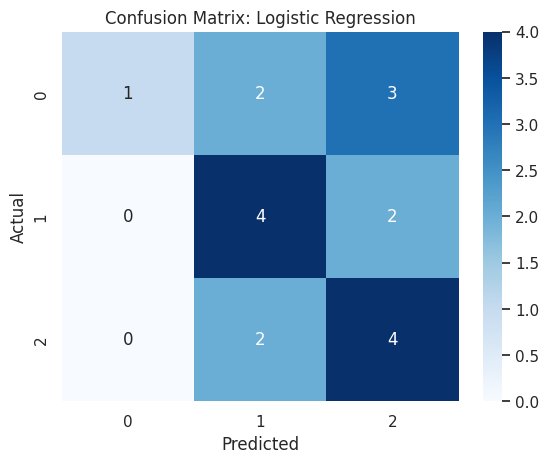

Cross-validation Accuracy Scores: [0.83333333 0.41666667 0.33333333 0.66666667 0.75      ]
Mean CV Accuracy: 0.6

🔹 Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       1.00      0.33      0.50         6
           2       0.36      0.67      0.47         6

    accuracy                           0.50        18
   macro avg       0.65      0.50      0.51        18
weighted avg       0.65      0.50      0.51        18

Accuracy: 0.5
AUC-ROC Score (OvR): 0.75


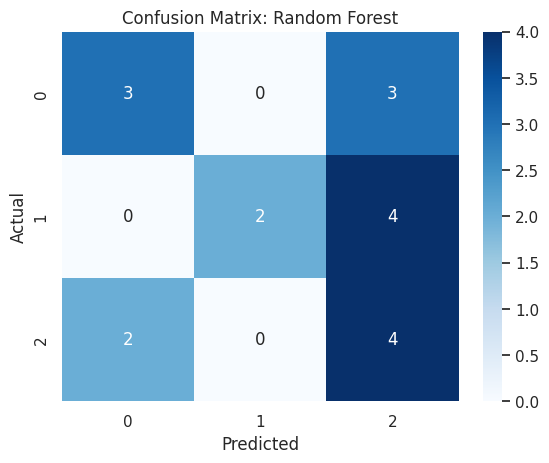

Cross-validation Accuracy Scores: [0.5        0.33333333 0.33333333 0.5        0.75      ]
Mean CV Accuracy: 0.4833333333333333

🔹 Model: Naive Bayes
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.50      0.67      0.57         6
           2       0.44      0.67      0.53         6

    accuracy                           0.50        18
   macro avg       0.65      0.50      0.46        18
weighted avg       0.65      0.50      0.46        18

Accuracy: 0.5
AUC-ROC Score (OvR): 0.7453703703703706


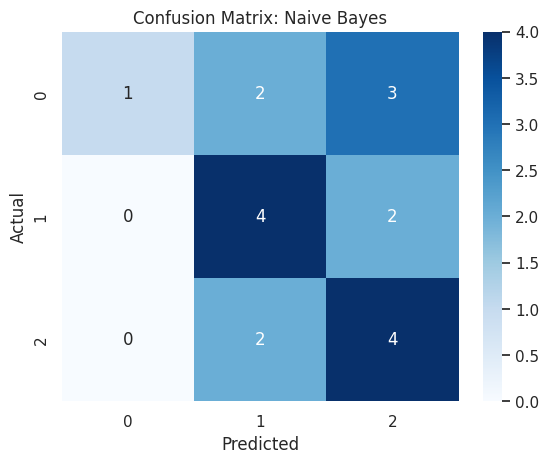

Cross-validation Accuracy Scores: [0.75       0.33333333 0.25       0.58333333 0.75      ]
Mean CV Accuracy: 0.5333333333333333


In [46]:
# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": MultinomialNB()
}

# Loop through models
for name, model in models.items():
    print(f"\n🔹 Model: {name}")

    # Fit
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Accuracy
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # AUC-ROC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
        print("AUC-ROC Score (OvR):", auc)
    else:
        print("AUC-ROC not available (model does not support probability prediction)")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Cross-validation Accuracy
    scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
    print("Cross-validation Accuracy Scores:", scores)
    print("Mean CV Accuracy:", scores.mean())


🔹 Model: MLPClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.33      1.00      0.50         6
           2       0.00      0.00      0.00         6

    accuracy                           0.33        18
   macro avg       0.11      0.33      0.17        18
weighted avg       0.11      0.33      0.17        18

Accuracy: 0.3333333333333333
AUC-ROC Score (OvR): 0.5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


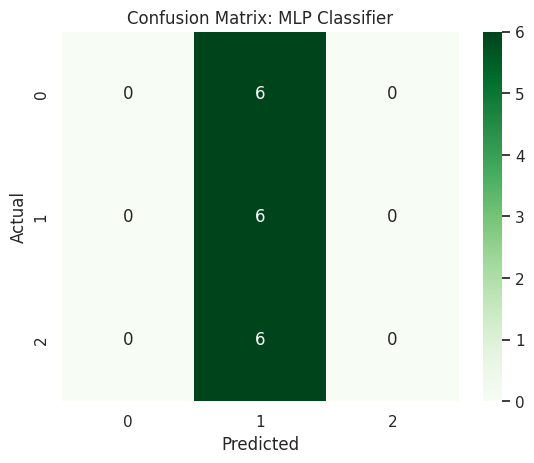

Cross-validation Accuracy Scores: [0.33333333 0.33333333 0.33333333 0.41666667 0.33333333]
Mean CV Accuracy: 0.35


In [47]:
from sklearn.neural_network import MLPClassifier

# Initialize MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64),  # two hidden layers
                          activation='relu',
                          solver='adam',
                          max_iter=300,
                          early_stopping=True,
                          n_iter_no_change=10,
                          validation_fraction=0.1,
                          random_state=42)

print("\n🔹 Model: MLPClassifier")

# Fit the model
mlp_model.fit(X_train, y_train)

# Predict on test set
y_pred_mlp = mlp_model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))

# AUC-ROC Score
if hasattr(mlp_model, "predict_proba"):
    y_proba_mlp = mlp_model.predict_proba(X_test)
    auc_mlp = roc_auc_score(y_test, y_proba_mlp, multi_class='ovr')
    print("AUC-ROC Score (OvR):", auc_mlp)
else:
    print("AUC-ROC not available (model does not support probability prediction)")

# Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix: MLP Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Cross-validation (optional)
from sklearn.model_selection import cross_val_score
cv_scores_mlp = cross_val_score(mlp_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print("Cross-validation Accuracy Scores:", cv_scores_mlp)
print("Mean CV Accuracy:", cv_scores_mlp.mean())

In [48]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(14), np.int64(1): np.int64(14), np.int64(2): np.int64(14)}


In [49]:
# Logistic Regression

# Best mean cross-validation score → generalizes better
# AUC-ROC is competitive (and quite strong)
# Simple, interpretable, and robust for small datasets

In [50]:
import pickle

# Assuming `model` is your trained LogisticRegression instance
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("✅ Logistic Regression model saved!")

✅ Logistic Regression model saved!


In [51]:
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)  # `tfidf` is your trained TfidfVectorizer
print("✅ TF-IDF vectorizer saved!")

✅ TF-IDF vectorizer saved!
